In [1]:
data pg_steam; /* Creates the file `pg_steam.sas' in the library `stat2131'*/
input seq month	steam fat glycerin wind cday opday frezday temp starts;  /* The variables we are creating */	
datalines;
1  1  10.98  5.20  0.61  7.4  31  20  22  35.3  4
2  2  11.13  5.12  0.64  8.0  29  20  25  29.7  5
3  3  12.51  6.19  0.78  7.4  31  23  17  30.8  4
4  4  8.40  3.89  0.49  7.5  30  20  22  58.8  4
5  5  9.27  6.28  0.84  5.5  31  21  0  61.4  5
6  6  8.73  5.76  0.74  8.9  30  22  0  71.3  4
7  7  6.36  3.45  0.42  4.1  31  11  0  74.4  2
8  8  8.50  6.57  0.87  4.1  31  23  0  76.7  5
9  9  7.82  5.69  0.75  4.1  30  21  0  70.7  4
10  10  9.14  6.14  0.76  4.5  31  20  0  57.5  5
11  11  8.24  4.84  0.65  10.3 30  20  11  46.4  4
12  12  12.19  4.88  0.62  6.9  31  21  12  28.9  4
13  1  11.88  6.03  0.79  6.6  31  21  25  28.1  5
14  2  9.57  4.55  0.60  7.3  28  19  18  39.1  5
15  3  10.94  5.71  0.70  8.1  31  23  5  46.8  4
16  4  9.58  5.67  0.74  8.4  30  20  7  48.5  4
17  5  10.09  6.72  0.85  6.1  31  22  0  59.3  6
18  6  8.11  4.95  0.67  4.9  30  22  0  70.0  4
19  7  6.83  4.62  0.45  4.6  31  11  0  70.0  3
20  8  8.88  6.60  0.95  3.7  31  23  0  74.5  4
21  9  7.68  5.01  0.64  4.7  30  20  0  72.1  4
22  10  8.47  5.68  0.75  5.3  31  21  1  58.1  6
23  11  8.86  5.28  0.70  6.2  30  20  14  44.6  4
24  12  10.36  5.36  0.67  6.8  31  20  22  33.4  4
25  1  11.08  5.87  0.70  7.5  31  22  28  28.6  5
;
run;
proc print data = stat2131.pg_steam; run;

SAS Connection established. Subprocess id is 25781




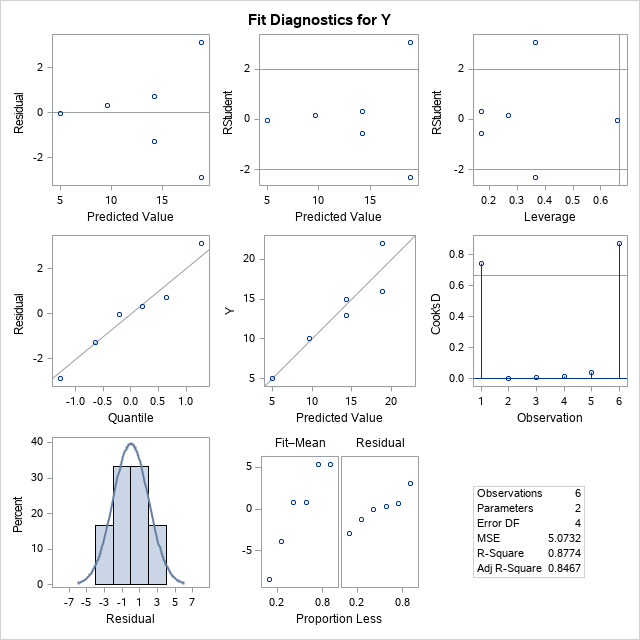
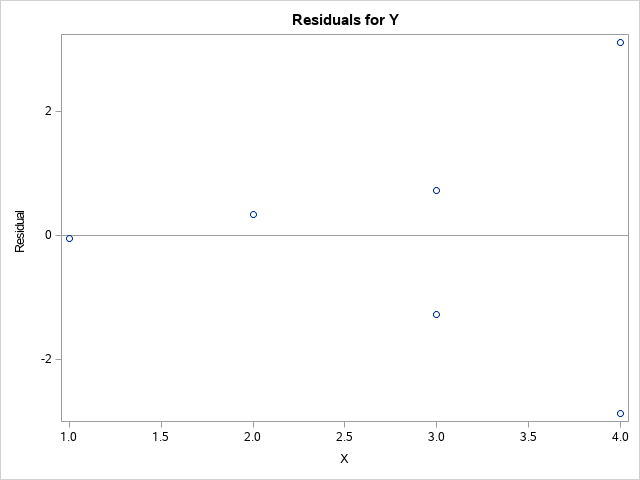
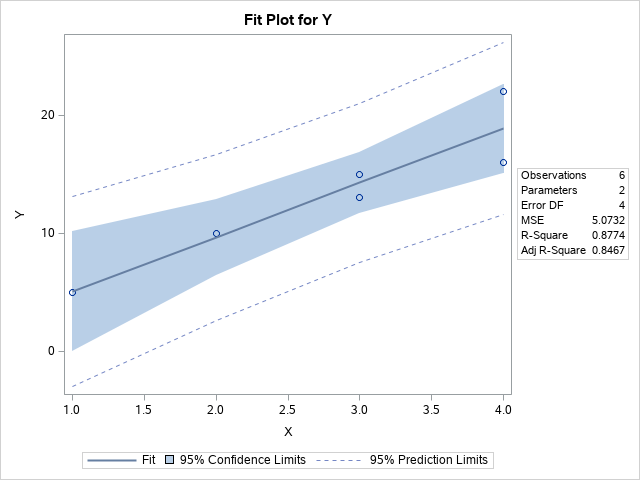

In [2]:
/** Extra sums of squares; type1: sequential, type2:partial*/
data q1;
input Y X;
datalines;
16 4
5 1
10 2
15 3
13 3
22 4
;
run;


proc reg data=q1; 
    model Y = X / ss1 ss2;
run;


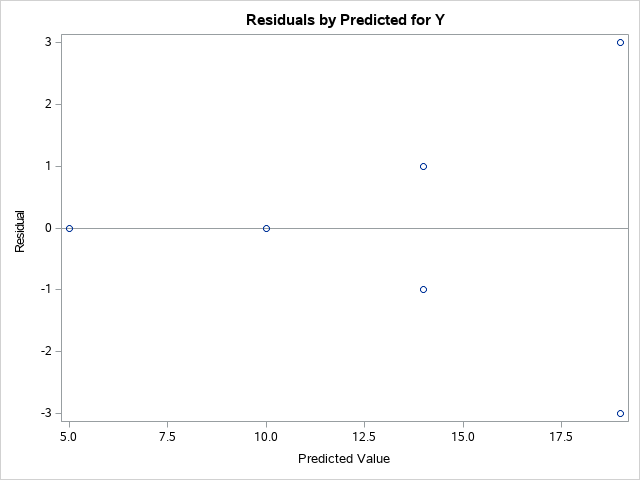
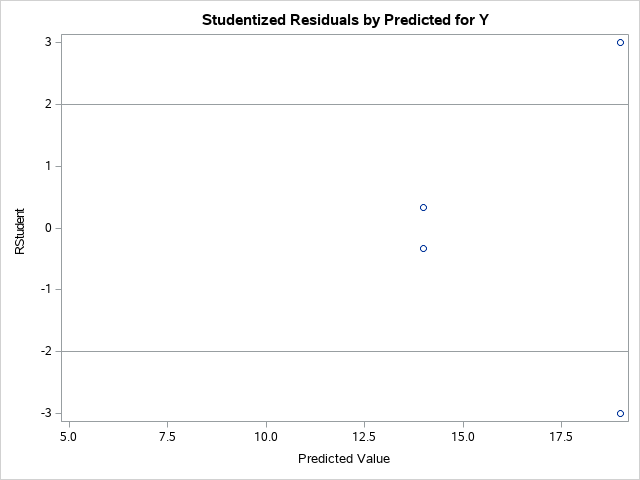
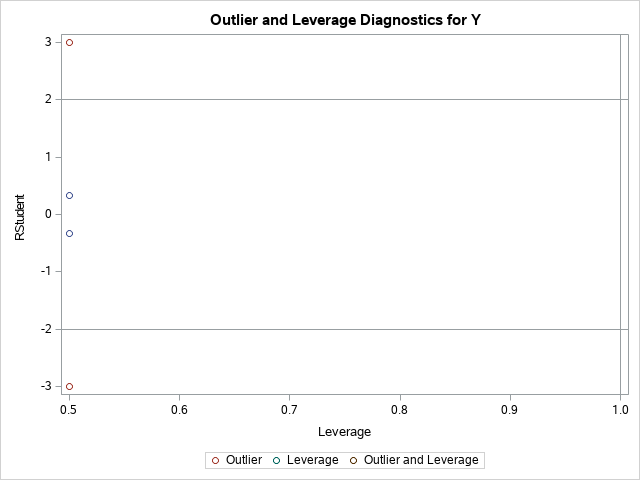
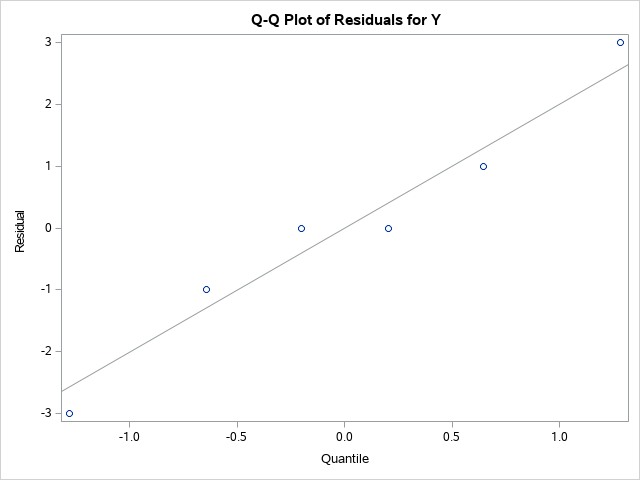
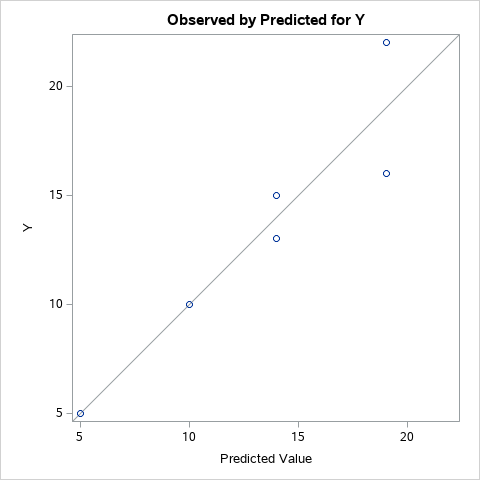
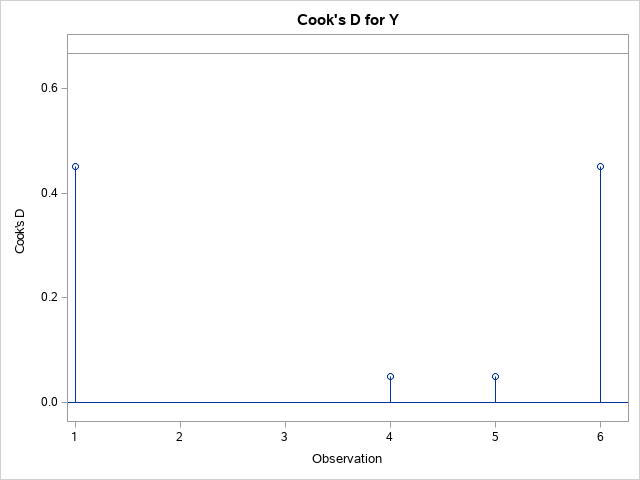
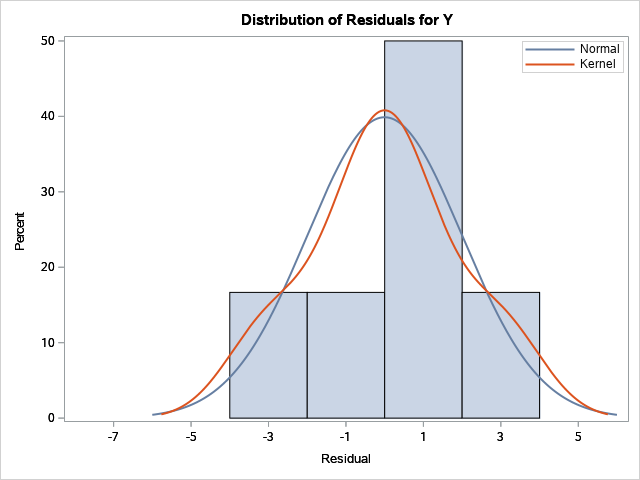
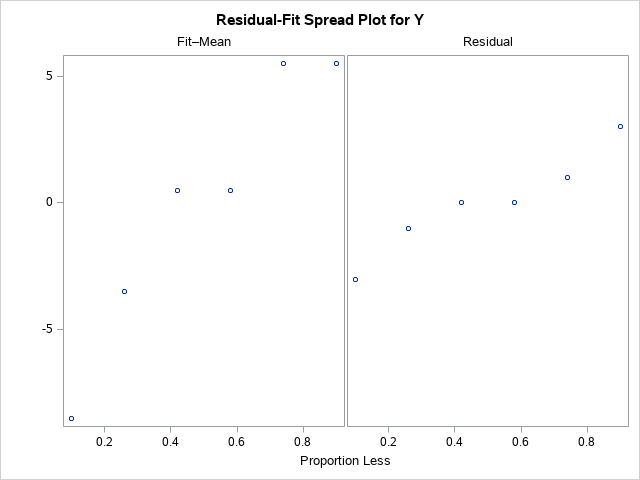
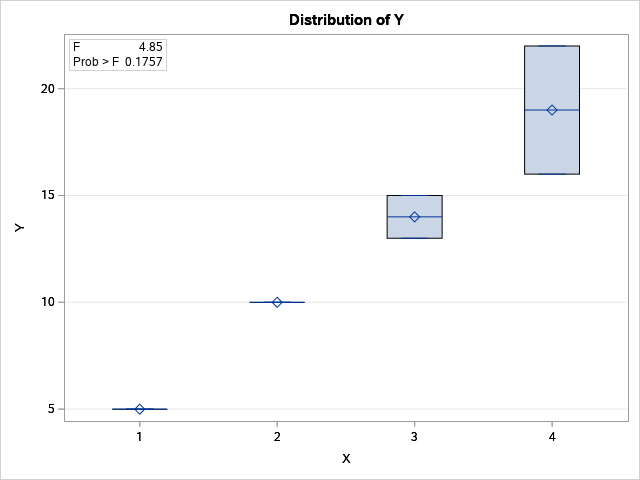

In [12]:
proc glm data=q1 PLOTS(UNPACK)=DIAGNOSTICS;
   class x;
   model y = x /solution clparm;
     estimate 'Difference in Level 1 and Level 3' x 1 0  -1 0;
run;

In [7]:
data body;
input person tri thigh arm fat;
datalines;
1 19.5  43.1  29.1  11.9
2 24.7  49.8  28.2  22.8
3  30.7  51.9  37.0  18.7
4  29.8  54.3  31.1  20.1
5  19.1  42.2  30.9  12.9
6  25.6  53.9  23.7  21.7
7  31.4  58.5  27.6  27.1
8  27.9  52.1  30.6  25.4
9  22.1  49.9  23.2  21.3
10  25.5  53.5  24.8  19.3
11  31.1  56.6  30.0  25.4
12  30.4  56.7  28.3  27.2
13  18.7  46.5  23.0  11.7
14  19.7  44.2  28.6  17.8
15  14.6  42.7  21.3  12.8
16  29.5  54.4  30.1  23.9
17  27.7  55.3  25.7  22.6
18  30.2  58.6  24.6  25.4
19  22.7  48.2  27.1  14.8
20  25.2  51.0  27.5  21.1
;
run;


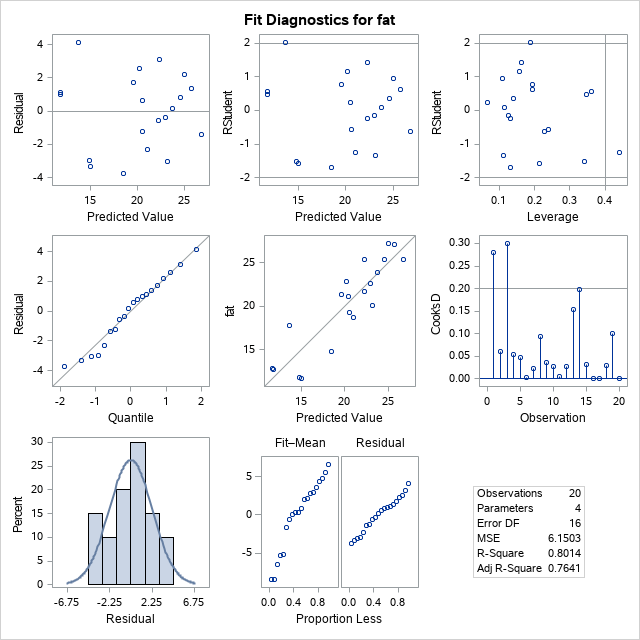
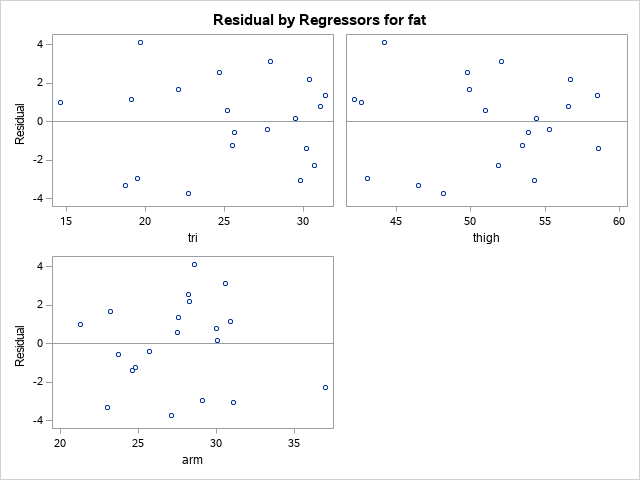
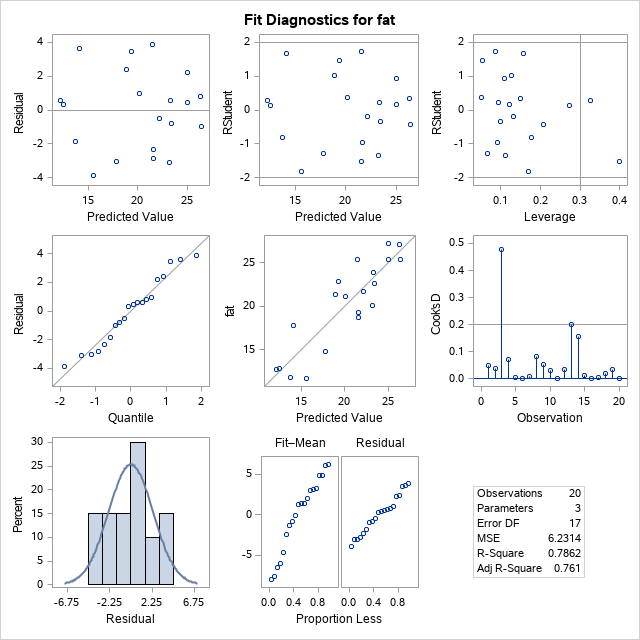
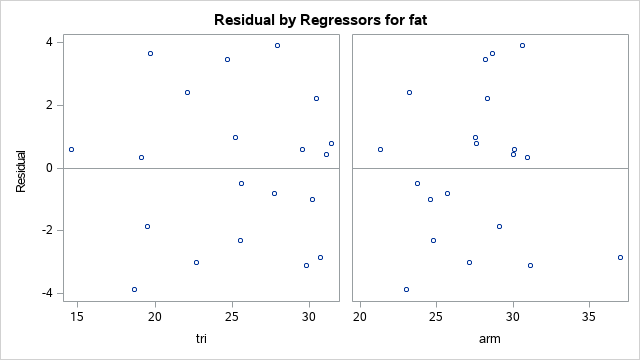

In [10]:
proc reg data=body;
model fat = tri thigh arm /vif;  *vif;
model fat = tri arm / vif;
run;